In [1]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2024-04-29 08:50:56.423236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define paths
data_dir_cat = '/Users/raani/Desktop/MINE/ml try practice/archive/animals/animals/cats'
data_dir_dog = '/Users/raani/Desktop/MINE/ml try practice/archive/animals/animals/dogs'
data_dir_panda = '/Users/raani/Desktop/MINE/ml try practice/archive/animals/animals/panda'

# Function to load images and labels
def load_data(data_dir, label):
    images = []
    labels = []
    for img in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load cat, dog, and panda images and labels
cat_images, cat_labels = load_data(data_dir_cat, 0)  # Label 0 for cat
dog_images, dog_labels = load_data(data_dir_dog, 1)  # Label 1 for dog
panda_images, panda_labels = load_data(data_dir_panda, 2)  # Label 2 for cow

# Concatenate cat, dog, and panda data
images = np.concatenate([cat_images, dog_images, panda_images])
labels = np.concatenate([cat_labels, dog_labels, panda_labels])

In [34]:
images

array([[[[0.73333335, 0.7490196 , 0.6509804 ],
         [0.09803922, 0.09803922, 0.09803922],
         [0.4862745 , 0.49019608, 0.47058824],
         ...,
         [0.49411765, 0.5019608 , 0.48235294],
         [0.12941177, 0.13725491, 0.11764706],
         [0.07058824, 0.08235294, 0.03921569]],

        [[0.73333335, 0.7490196 , 0.6509804 ],
         [0.08627451, 0.08627451, 0.08627451],
         [0.73333335, 0.7372549 , 0.7176471 ],
         ...,
         [0.5882353 , 0.59607846, 0.5764706 ],
         [0.23137255, 0.23921569, 0.21960784],
         [0.10588235, 0.11764706, 0.09019608]],

        [[0.75686276, 0.77254903, 0.6745098 ],
         [0.08235294, 0.08235294, 0.08235294],
         [0.76862746, 0.77254903, 0.7529412 ],
         ...,
         [0.0627451 , 0.07058824, 0.05098039],
         [0.05882353, 0.06666667, 0.04705882],
         [0.01176471, 0.01960784, 0.01568628]],

        ...,

        [[0.79607844, 0.79607844, 0.7882353 ],
         [0.8       , 0.8       , 0.7921569 ]

In [36]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [33]:
labels.shape

(3000,)

In [4]:
# Data Augmentation

#Creating new train examples by applying
#trasnformations to input data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  #nearest available pixels
)

In [25]:
# Train-validation-test split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [26]:
train_images.shape

(2400, 150, 150, 3)

In [27]:
train_labels.shape

(2400,)

In [6]:
# Apply data augmentation to training data
train_generator = datagen.flow(train_images, train_labels, batch_size=32)


In [28]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),#helps in reducing computational complexity and controlling overfitting.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),#lower features
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),#more deeper features
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])




In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Define callbacks
checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [30]:

test_images.shape

(600, 150, 150, 3)

In [31]:
test_labels.shape

(600,)

In [13]:
# Train the model
history = model.fit(train_generator, epochs=5, validation_data=(test_images, test_labels), callbacks=[checkpoint])


Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4022 - loss: 1.3913
Epoch 1: val_accuracy improved from -inf to 0.56556, saving model to model_checkpoint.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.4035 - loss: 1.3867 - val_accuracy: 0.5656 - val_loss: 0.8912
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6012 - loss: 0.8385
Epoch 2: val_accuracy improved from 0.56556 to 0.59444, saving model to model_checkpoint.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6011 - loss: 0.8381 - val_accuracy: 0.5944 - val_loss: 0.7835
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6317 - loss: 0.7312
Epoch 3: val_accuracy did not improve from 0.59444
66/66 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6317 - loss: 0.7315 - val_accuracy: 0.5556 - val_loss: 1.0233
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6485 - loss: 0.7273
Epoch 4: val_accuracy did not improve from 0.59444
66/66 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accur

In [14]:

# Save the final model
model.save("final_model.keras")

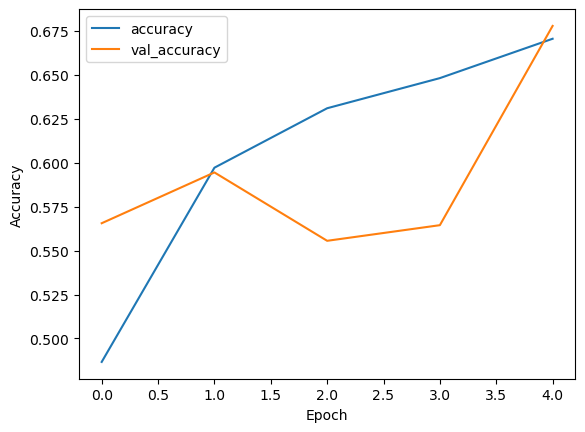

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step


In [17]:

# Generate classification report
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       313
           1       0.61      0.45      0.52       291
           2       0.76      0.96      0.85       296

    accuracy                           0.68       900
   macro avg       0.67      0.68      0.66       900
weighted avg       0.66      0.68      0.66       900



In [18]:
from sklearn.metrics import confusion_matrix

# Assuming test_labels and predicted_labels are the true labels and predicted labels respectively
# test_labels: true labels of the test sset
# predicted_labels: predicted labels by your model

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[195  74  44]
 [115 130  46]
 [  2   9 285]]
